In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import DATA_DIR
import os

In [13]:
partitioning = pd.read_pickle(
    os.path.join(DATA_DIR, 'data_partitioning.pkl')
)
partitioning

,ra,dec,submitter,alerceclass,partition
oid,,,,,
ZTF18aakpnyt,195.083342,61.655024,lhernandez,AGN,test
ZTF18aarpwag,246.360611,57.457688,lhernandez,AGN,test
ZTF18aacbjdm,188.015156,20.158207,lhernandez,AGN,test
ZTF18aaolytx,247.932508,52.895604,lhernandez,AGN,test
ZTF18abwxbmh,12.895890,29.401259,lhernandez,AGN,test
...,...,...,...,...,...
ZTF20acoctap,74.422597,-1.896526,sbernal,RSCVn,validation_4
ZTF20aahqbsr,225.477760,25.966390,rdastidar,nonSNIa,validation_4
ZTF17aaanrio,100.191711,9.299480,abayo,YSO,validation_4


In [4]:
lc_filename = os.path.join(
    DATA_DIR,
    'curves_000.pkl'
)
lc = pd.read_pickle(lc_filename)
lc.set_index('oid', inplace=True)
lc

,index,forcediffimflux,forcediffimfluxunc,forcediffimsnr,mjd,fid,mag_tot,sigma_mag_tot
oid,,,,,,,,
ZTF17aaaaajz,1,-145.802293,85.024502,-1.907546,58206.164306,1,20.405711,0.445757
ZTF17aaaaajz,3,251.372644,85.134938,3.284468,58231.144884,2,16.536593,0.014736
ZTF17aaaaajz,4,303.872435,154.030717,2.194516,58234.141609,1,19.098928,0.268886
ZTF17aaaaajz,5,-508.990178,61.804035,-9.161095,58303.480729,2,16.676931,0.012178
ZTF17aaaaajz,6,-21.354098,84.347569,-0.281620,58304.481157,1,19.897165,0.286292
...,...,...,...,...,...,...,...,...
ZTF17aaanoqn,987,7367.848609,57.140836,143.432941,59409.467037,2,13.615019,0.000741
ZTF17aaanoqn,988,7406.428000,53.967628,152.661763,59409.469479,2,13.614960,0.000696
ZTF17aaanoqn,989,5784.686932,57.929533,111.079683,59409.471921,2,13.635901,0.000764


In [30]:
partitioning.loc[lc.index.unique()].groupby('alerceclass').count()

,ra,dec,submitter,partition
alerceclass,,,,
Blazar,40,40,40,40
CVNova,216,216,216,216
Ceph,188,188,188,188
DSCT,187,187,187,187
EA,264,264,264,264
EBEW,339,339,339,339
LPV,232,232,232,232
Periodic-Other,35,35,35,35
RRLab,333,333,333,333


In [24]:
oid = lc.index.unique().values[4]
lc_sample = lc.loc[oid]
lc_sample = lc_sample[lc_sample['fid'].isin([1, 2])]
lc_sample

,index,forcediffimflux,forcediffimfluxunc,forcediffimsnr,mjd,fid,mag_tot,sigma_mag_tot
oid,,,,,,,,
ZTF17aaaactd,1,-1559.996886,53.368514,-32.515724,58359.462627,2,18.457282,0.049630
ZTF17aaaactd,2,-1719.251123,42.691054,-44.797857,58359.504456,2,18.697831,0.051644
ZTF17aaaactd,3,-196.838014,56.827253,-3.853072,58362.512442,1,20.452470,0.299678
ZTF17aaaactd,4,239.605825,41.998084,6.346331,58365.464676,1,19.182901,0.074690
ZTF17aaaactd,5,2506.671970,54.811205,50.872485,58365.517986,2,16.850120,0.011118
...,...,...,...,...,...,...,...,...
ZTF17aaaactd,388,326.523806,88.201520,4.118069,59296.173472,1,19.058209,0.134434
ZTF17aaaactd,389,534.668023,87.416711,6.803690,59298.150139,2,17.339121,0.029438
ZTF17aaaactd,390,1005.330420,64.334143,17.382895,59301.153437,2,17.215698,0.017750


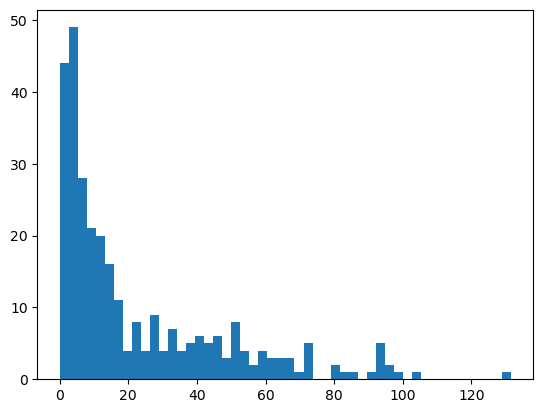

In [25]:
plt.hist(np.abs(lc_sample['forcediffimsnr']), bins=50);

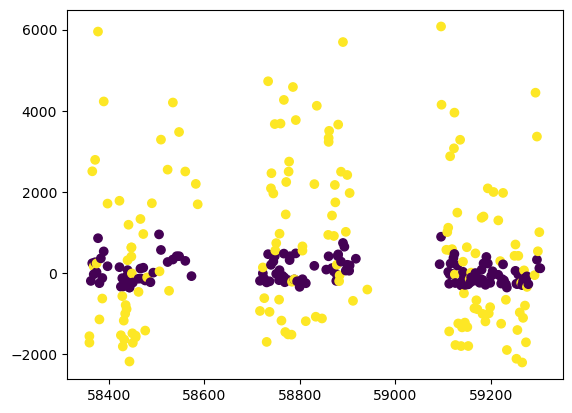

In [26]:
plt.scatter(
    lc_sample['mjd'],
    lc_sample['forcediffimflux'],
    c=lc_sample['fid']
)

In [27]:
partitioning.loc[oid]

,ra,dec,submitter,alerceclass,partition
oid,,,,,
ZTF17aaaactd,86.638705,0.047768,abayo,YSO,training_0
ZTF17aaaactd,86.638705,0.047768,abayo,YSO,training_1
ZTF17aaaactd,86.638705,0.047768,abayo,YSO,training_2
ZTF17aaaactd,86.638705,0.047768,abayo,YSO,training_3
ZTF17aaaactd,86.638705,0.047768,abayo,YSO,training_4


In [33]:
oids = partitioning.loc[lc.index.unique()].groupby('alerceclass', group_keys=False).apply(lambda x: x.sample())
oids

,ra,dec,submitter,alerceclass,partition
oid,,,,,
ZTF17aaajvds,53.096949,-11.330736,fbauer,Blazar,training_0
ZTF17aaagccm,58.325855,-3.813127,arojas,CVNova,test
ZTF17aaajtgd,0.441470,62.424234,gcabrera,Ceph,training_3
ZTF17aaailio,94.912573,40.143295,ksharma,DSCT,training_2
ZTF17aaahakq,67.002814,-22.536551,ireyes,EA,training_4
ZTF17aaajiiw,160.651251,64.394653,fforster,EBEW,training_2
ZTF17aaadbvh,67.463696,38.993179,ecamacho,LPV,training_1
ZTF17aaaizcd,137.680044,1.719497,gpignata,Periodic-Other,training_4
ZTF17aaagril,0.613104,53.865760,kespindola,RRLab,training_1


In [40]:
lc.loc[oids.index.values].to_parquet(
    '../../../libs/lc_classifier/lc_classifier/examples/ztf_forced_examples_training.parquet')